# TP 1

In [1]:
# exercice1
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import scipy.stats as stats

In [2]:
def simulation(x0, N):
    Z = x0
    L = [x0]
    
    X = np.linspace(0, 10, 150)
    
    while Z != N:
        Z = random.randint(Z,N+1)
        L.append(Z)
        
    tau = len(L)  # tau correspond a la taille du vecteur de position  
    
    return L


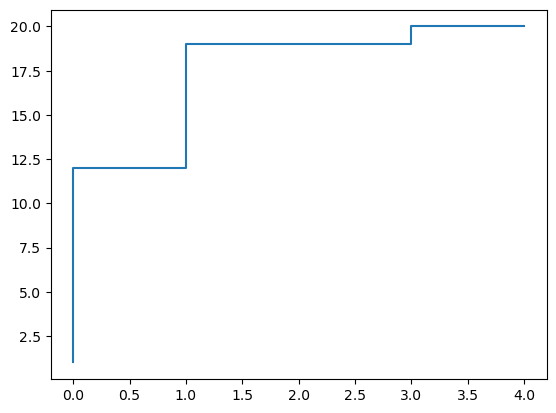

In [3]:
x=1
v = simulation(x,20)
plt.step(np.arange(0,len(v)),v)

In [4]:
# calcul des espérances
def esperance(x0, N, M):
    # nombre de simulations M
    T=0 # temps total
    for k in range(1, M):
        #E[k] = (N/N-k) + (1/ N-k)
        T += len(simulation(x0, N)) - 1
    return T/M
      

In [5]:
x0 =2
N =3
M= 1000
print(f"le temps moyen partant de {x0} avec N={N} et  M={M} est environ:",
      esperance(x0,N,M))

le temps moyen partant de 2 avec N=3 et  M=1000 est environ: 1.99


In [6]:
print("Le temps moyen partant de 1 pour 3 est: ", esperance(1,3,1000))

Le temps moyen partant de 1 pour 3 est:  2.636


# Exercice 2

In [7]:
def marcheAleatoire(x0, p, n):
    #x0 point de départ
    #p: proba d'aller a droite
    #n longueur de la trajectoire
    marche = [x0]
    count = 0
    for i in range(n):
        x0 += 2 * (random.rand()<p) - 1
        marche.append(x0)
        if x0 == 0:
            count+=1
    print(f"On est passé {count} fois en 0")
    return marche
    
    

In [8]:
abscisse = np.arange(0, len(res))
res = marcheAleatoire(0, 1/2, 1000)
res1 = marcheAleatoire(0, 3/4, 1000)
plt.plot(abscisse,res)
plt.step(abscisse, 1/2*abscisse)
plt.plot(np.arange(0, len(res1)), res1, color='red')
plt.axhline(y= 0, xmin=0, xmax=len(res), color='black')


NameError: name 'res' is not defined

In [9]:
def nbpassages(x,N,p):
    z=x
    temps_de_passages= [0]
    compt=1
    for i in range(N):
        z+=2*(random.rand()<p)-1
        compt += 1
        if z == 0:
            temps_de_passages.append(compt)
    plt.plot(temps_de_passages, np.arange(1, len(temps_de_passages)+1))
    return temps_de_passages

[0, 365, 503, 507, 511, 515, 519, 521, 523]

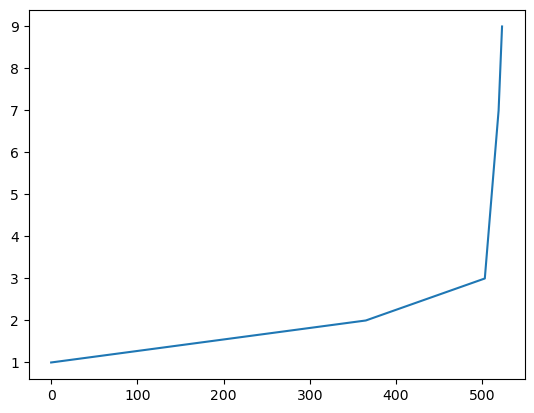

In [10]:
nbpassages(0,1000,1/2)

## Exercice 4: dynamique de Galton-Watson

In [67]:
# génération du vecteur Z

proba = [1/5,7/10,1/10]
Z0 = 1
    
def Z(n,p,z):
    val = [0,1,2]  # vecteur D_n,k
    Z = [z]
    for i in range(1,n):
        #for k in range():
        D = np.sum(np.random.choice(val, z, p=p))   
        Z.append(D)
        z = D
    return Z
         

In [54]:
Z(10,proba, 1)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
def approximation(n,p,z,M):
    V = np.zeros(n+1)
    for i in range(M):
        v = np.array(Z(n,p,z))
        V+=(v==0)
    plt.plot(np.arange(n+1), V/M)
    #plt.title(r'Evolution de $k\mapsto \mathbb{P}(Z_k=0)$' f'avec p={p}')
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

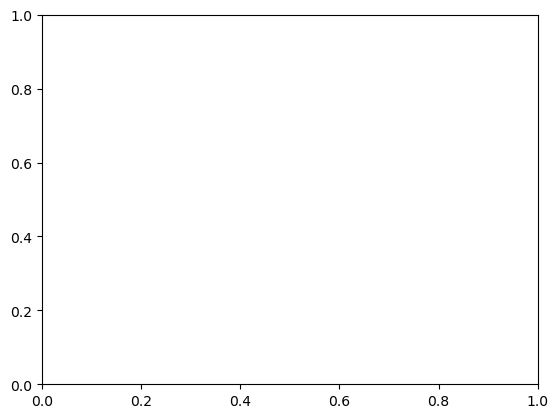

In [74]:
p= [1/5,7/10,1/10]
approximation(10,p,1,50)